In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
dataset=pd.read_csv('International_Breweries.csv')

In [3]:
dataset.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017


In [4]:
dataset.shape

(1047, 13)

# Within the space of the last three years, what was the profit worth of the breweries, inclusive of the anglophone and the francophone territories?

In [5]:
dataset['COUNTRIES'].unique()

array(['Ghana', 'Nigeria', 'Togo', 'Benin', 'Senegal'], dtype=object)

In [6]:
## Dividing the countries into territories 
c=[]
for i in dataset['COUNTRIES']:
    if i == 'Ghana':
        c.append('Anglophone')
    elif i=='Nigeria':
        c.append('Anglophone')
    else: 
        c.append('Francophone')

In [7]:
dataset['TERRITORY']=c

In [8]:
dataset.describe()

,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,10624.000000,152.989494,271.728749,850.737345,231034.049666,100847.583572,2017.941738
std,302.387169,53.125477,133.378553,86.991652,115658.626612,77581.775930,0.808325
min,10101.000000,80.000000,150.000000,700.000000,105300.000000,35000.000000,2017.000000
25%,10362.500000,90.000000,150.000000,776.000000,141425.000000,46880.000000,2017.000000
50%,10624.000000,150.000000,200.000000,853.000000,184400.000000,58080.000000,2018.000000
75%,10885.500000,180.000000,450.000000,927.000000,351450.000000,191205.000000,2019.000000
max,11147.000000,250.000000,500.000000,1000.000000,499500.000000,269190.000000,2019.000000


In [9]:
dataset['PROFIT'].sum()

105587420

# PROFIT COMPARISON BY TERRITORY

In [10]:
o=dataset.groupby('TERRITORY')

In [14]:
Group_Anglophone=o.sum()
Group_Anglophone.drop(['SALES_ID','PLANT_COST','UNIT_PRICE','COST','QUANTITY','YEARS'],axis=1,inplace=True)

In [15]:
Group_Anglophone

,PROFIT
TERRITORY,
Anglophone,42389260
Francophone,63198160


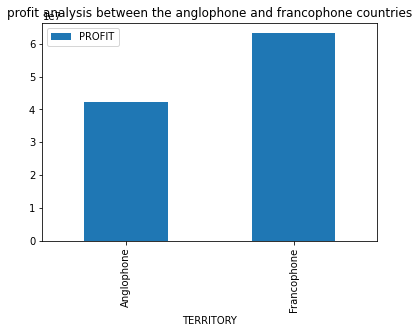

In [16]:
Group_Anglophone.plot(kind='bar',title='profit analysis between the anglophone and francophone countries')

The francophone region made far more profit than the anglophone region. This may have been because the francophone region has three countries(togo,senegal and benin)

# COUNTRY THAT GENERATED HIGHEST PROFIT IN 2019

In [20]:
group_data = dataset.groupby(['YEARS','COUNTRIES'])['PROFIT'].sum()
group_data

YEARS  COUNTRIES
2017   Benin        7795390
       Ghana        7176000
       Nigeria      8573550
       Senegal      8289100
       Togo         6669280
2018   Benin        7893240
       Ghana        6692980
       Nigeria      7997340
       Senegal      6508530
       Togo         7971760
2019   Benin        5273340
       Ghana        7144070
       Nigeria      4805320
       Senegal      6687560
       Togo         6109960
Name: PROFIT, dtype: int64

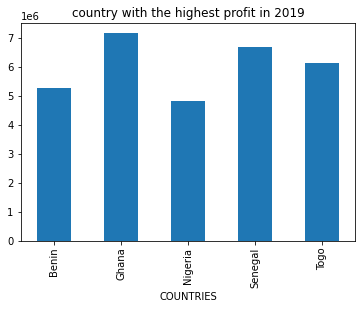

In [127]:
group_data[2019].plot(kind='bar',title='country with the highest profit in 2019')

In [ ]:
Insight: Ghana made the highest profit in 2019

# YEAR WITH THE HIGHEST PROFIT

In [16]:
year=(dataset.groupby('YEARS').sum().reset_index())

In [17]:
year

,YEARS,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT
0,2017,3974744,57260,102650,317563,87081100,38503320
1,2018,3822112,55830,99600,305409,84486200,37063850
2,2019,3326472,47090,82250,267750,70325350,30020250


In [18]:
profit_year=year[['PROFIT','YEARS']]

In [19]:
year[['PROFIT']].max()

PROFIT    38503320
dtype: int64

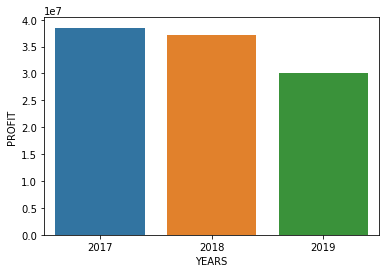

In [20]:
sns.barplot(x = 'YEARS', y = 'PROFIT', data = year)

Insight: The highest profit was made in 2017

# WHICH MONTH IN THE THREE YEARS WERE THE LEAST PROFIT GENERATED 

In [21]:
dataset

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,Francophone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,11143,Jardine,jard@gmail.com,grand malt,90,150,962,144300,57720,Togo,northeast,November,2017,Francophone
1043,11144,Jardine,jard@gmail.com,trophy,150,200,892,178400,44600,Benin,northcentral,December,2017,Francophone
1044,11145,Andrews,andy@gmail.com,budweiser,250,500,816,408000,204000,Senegal,Southeast,January,2019,Francophone
1045,11146,Jones,jone.ai@yahoo.com,castle lite,180,450,939,422550,253530,Ghana,west,February,2017,Anglophone


In [22]:
a=dataset.groupby('MONTHS').sum().reset_index()
a

,MONTHS,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS
0,April,923940,13350,23700,72562,19677450,8573830,175560
1,August,924288,13240,23400,74908,20094800,8730940,175558
2,December,924636,13320,23650,73538,20085800,8787290,175557
3,February,934912,13510,24100,74847,20531850,9028450,177579
4,January,934824,13490,23900,74373,20129050,8722990,177583
5,July,924201,13260,23600,74591,20107350,8787010,175560
6,June,924114,13340,23700,73637,20152500,8828440,175571
7,March,935000,13420,23850,76206,20746800,9066130,177583
8,May,924027,13320,23650,74089,20128500,8772250,175559
9,November,924549,13350,23700,74120,20207200,8820330,175566


In [23]:
a[['MONTHS','PROFIT']].sort_values('PROFIT',ascending=True)

,MONTHS,PROFIT
0,April,8573830
11,September,8702660
4,January,8722990
1,August,8730940
10,October,8767100
8,May,8772250
5,July,8787010
2,December,8787290
9,November,8820330
6,June,8828440


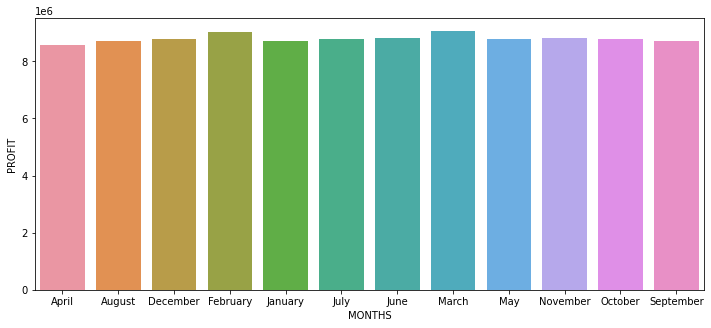

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(x = 'MONTHS', y = 'PROFIT', data = a)

# WHICH MONTH MADE THE MINIMUM PROFIT IN 2018

In [25]:
dataset

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,Francophone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,11143,Jardine,jard@gmail.com,grand malt,90,150,962,144300,57720,Togo,northeast,November,2017,Francophone
1043,11144,Jardine,jard@gmail.com,trophy,150,200,892,178400,44600,Benin,northcentral,December,2017,Francophone
1044,11145,Andrews,andy@gmail.com,budweiser,250,500,816,408000,204000,Senegal,Southeast,January,2019,Francophone
1045,11146,Jones,jone.ai@yahoo.com,castle lite,180,450,939,422550,253530,Ghana,west,February,2017,Anglophone


In [27]:
x=dataset.groupby(['YEARS','MONTHS']).sum().reset_index()
x

,YEARS,MONTHS,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT
0,2017,April,328272,4630,7750,25804,6417700,2574380
1,2017,August,362428,5000,8950,28803,7546400,3315910
2,2017,December,340252,5030,8400,26959,7070750,2836350
3,2017,February,245114,3740,7100,19717,6126350,2912440
4,2017,January,351417,4830,8700,27365,7211850,3200220
5,2017,July,340428,4830,8350,27942,7204100,3042410
6,2017,June,275704,3820,7000,21747,5877850,2686370
7,2017,March,295004,4390,8100,24553,7178850,3294680
8,2017,May,362290,5450,10100,29114,8673650,4002260
9,2017,November,319374,4770,8850,25453,7450400,3413010


In [28]:
N=x[['PROFIT','YEARS','MONTHS']]
N

,PROFIT,YEARS,MONTHS
0,2574380,2017,April
1,3315910,2017,August
2,2836350,2017,December
3,2912440,2017,February
4,3200220,2017,January
5,3042410,2017,July
6,2686370,2017,June
7,3294680,2017,March
8,4002260,2017,May
9,3413010,2017,November


In [29]:
Min=N.loc[12:23]
Min

,PROFIT,YEARS,MONTHS
12,3147980,2018,April
13,2432230,2018,August
14,3902160,2018,December
15,4749130,2018,February
16,2259610,2018,January
17,2799260,2018,July
18,3472990,2018,June
19,3240830,2018,March
20,2196950,2018,May
21,2731710,2018,November


In [30]:
Min['PROFIT'].min()

2196950

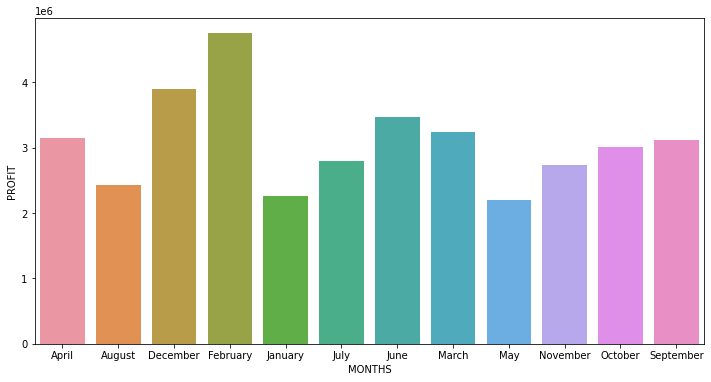

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'MONTHS', y = 'PROFIT', data = Min)

# Compare the profit in percentage for each of the month in 2019

In [23]:
dataset.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,Francophone


In [30]:
b=dataset.groupby(['YEARS','MONTHS']).sum().reset_index()
b

,YEARS,MONTHS,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT
0,2017,April,328272,4630,7750,25804,6417700,2574380
1,2017,August,362428,5000,8950,28803,7546400,3315910
2,2017,December,340252,5030,8400,26959,7070750,2836350
3,2017,February,245114,3740,7100,19717,6126350,2912440
4,2017,January,351417,4830,8700,27365,7211850,3200220
5,2017,July,340428,4830,8350,27942,7204100,3042410
6,2017,June,275704,3820,7000,21747,5877850,2686370
7,2017,March,295004,4390,8100,24553,7178850,3294680
8,2017,May,362290,5450,10100,29114,8673650,4002260
9,2017,November,319374,4770,8850,25453,7450400,3413010


In [38]:
b['%profit']= ((dt2019['PROFIT']/dt2019['PROFIT'].sum())*100)

In [39]:
dt2019=b.iloc[24:]
dt2019

,YEARS,MONTHS,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,%profit
24,2019,April,266316,4040,7500,21048,6227650,2851470,9.498489
25,2019,August,276212,3970,7350,22822,6457600,2982800,9.935960
26,2019,December,243844,3360,5750,19684,4908000,2048780,6.824660
27,2019,February,191520,2520,4050,15631,3556450,1366880,4.553193
28,2019,January,341412,5140,9050,27379,7649200,3263160,10.869863
29,2019,July,276462,4020,7500,22251,6395700,2945340,9.811177
30,2019,June,329390,4730,7850,26318,6715650,2669080,8.890932
31,2019,March,287973,3990,6950,22894,5924300,2530620,8.429710
32,2019,May,285699,3970,7050,22819,5932250,2573040,8.571015
33,2019,November,317370,4420,7500,25573,6476500,2675610,8.912684


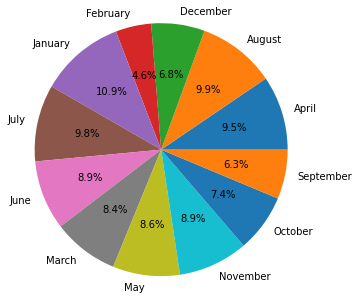

In [40]:
plt.figure(figsize=(5,5))
plt.pie(dt2019['PROFIT'],autopct='%1.1f%%', shadow=False, labels=dt2019['MONTHS'])
plt.axis('equal')
plt.show()

# Which particular brand generated the highest profit in Senegal?

In [43]:
dataset

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,Francophone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,11143,Jardine,jard@gmail.com,grand malt,90,150,962,144300,57720,Togo,northeast,November,2017,Francophone
1043,11144,Jardine,jard@gmail.com,trophy,150,200,892,178400,44600,Benin,northcentral,December,2017,Francophone
1044,11145,Andrews,andy@gmail.com,budweiser,250,500,816,408000,204000,Senegal,Southeast,January,2019,Francophone
1045,11146,Jones,jone.ai@yahoo.com,castle lite,180,450,939,422550,253530,Ghana,west,February,2017,Anglophone


In [44]:
d=dataset.groupby(['COUNTRIES','BRANDS']).sum()
d

SALES_ID  PLANT_COST  UNIT_PRICE  QUANTITY      COST  \
COUNTRIES BRANDS                                                              
Benin     beta malt      308096        2320        4350     23902   3585300   
          budweiser      318495        7500       15000     25156  12578000   
          castle lite    318945        5400       13500     25639  11537550   
          eagle lager    318345        5100        7500     24876   6219000   
          grand malt     318645        2700        4500     24967   3745050   
          hero           318795        4500        6000     26126   5225200   
          trophy         319095        4500        6000     25658   5131600   
Ghana     beta malt      318405        2400        4500     25408   3811200   
          budweiser      318705        7500       15000     24419  12209500   
          castle lite    319155        5400       13500     25806  11612700   
          eagle lager    318555        5100        7500     25829   6457250   
          grand malt     318855        2700        4500     25615   3842250   
          hero           319005        4500        6000     25654   5130800   
          trophy         318255        4500        6000     25524   5104800   
Nigeria   beta malt      319035        2400        4500     25381   3807150   
          budweiser      318285        7500       15000     26153  13076500   
          castle lite    318735        5400       13500     25681  11556450   
          eagle lager    319185        5100        7500     25872   6468000   
          grand malt     318435        2700        4500     24666   3699900   
          hero           318585        4500        6000     25811   5162200   
          trophy         318885        4500        6000     25743   5148600   
Senegal   beta malt      318825        2400        4500     25625   3843750   
          budweiser      319125        7500       15000     25923  12961500   
          castle lite    318525        5400       13500     25974  11688300   
          eagle lager    318975        5100        7500     25771   6442750   
          grand malt     308125        2610        4350     25428   3814200   
          hero           318375        4500        6000     26632   5326400   
          trophy         318675        4500        6000     25575   5115000   
Togo      beta malt      318615        2400        4500     24747   3712050   
          budweiser      318915        7500       15000     24623  12311500   
          castle lite    318315        5400       13500     25074  11283300   
          eagle lager    318765        5100        7500     25455   6363750   
          grand malt     319065        2700        4500     25613   3841950   
          hero           308067        4350        5800     24837   4967400   
          trophy         318465        4500        6000     25559   5111800   

                        PROFIT  YEARS  
COUNTRIES BRANDS                       
Benin     beta malt    1673140  58513  
          budweiser    6289000  60536  
          castle lite  6922530  60535  
          eagle lager  1990080  60537  
          grand malt   1498020  60543  
          hero         1306300  60538  
          trophy       1282900  60541  
Ghana     beta malt    1778560  60540  
          budweiser    6104750  60543  
          castle lite  6967620  60536  
          eagle lager  2066320  60536  
          grand malt   1536900  60544  
          hero         1282700  60547  
          trophy       1276200  60542  
Nigeria   beta malt    1776670  60540  
          budweiser    6538250  60532  
          castle lite  6933870  60533  
          eagle lager  2069760  60536  
          grand malt   1479960  60539  
          hero         1290550  60540  
          trophy       1287150  60537  
Senegal   beta malt    1793750  60535  
          budweiser    6480750  60536  
          castle lite  7012980  60538  
          eagle lager  2061680  60542  
          grand mal

In [45]:
b=d.loc['Senegal'].reset_index()
b

,BRANDS,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS
0,beta malt,318825,2400,4500,25625,3843750,1793750,60535
1,budweiser,319125,7500,15000,25923,12961500,6480750,60536
2,castle lite,318525,5400,13500,25974,11688300,7012980,60538
3,eagle lager,318975,5100,7500,25771,6442750,2061680,60542
4,grand malt,308125,2610,4350,25428,3814200,1525680,58520
5,hero,318375,4500,6000,26632,5326400,1331600,60536
6,trophy,318675,4500,6000,25575,5115000,1278750,60544


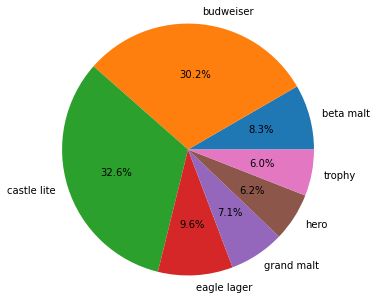

In [51]:
plt.figure(figsize=(5,5))
plt.pie(b['PROFIT'],autopct='%1.1f%%', shadow=False, labels=b['BRANDS'])
plt.axis('equal')
plt.show()